# Stats Based Anomaly Detection

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Load dataset

In [2]:
df = pd.read_csv("/kaggle/input/beijing-pm25-data-data-set/PRSA_data_2010.1.1-2014.12.31.csv")
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [3]:
df = df[["pm2.5", "year", "month", "day", "hour"]].dropna()

# Datetime index


In [4]:
df["timestamp"] = pd.to_datetime(df[["year", "month", "day", "hour"]])
df = df.set_index("timestamp").sort_index()

# Z-score


In [5]:
mean_val = df["pm2.5"].mean()
std_val = df["pm2.5"].std()

df["zscore"] = (df["pm2.5"] - mean_val) / std_val
df["anomaly_z"] = (df["zscore"].abs() > 3).astype(int)

print("Outliers detected:", df["anomaly_z"].sum())

Outliers detected: 769


# Plot

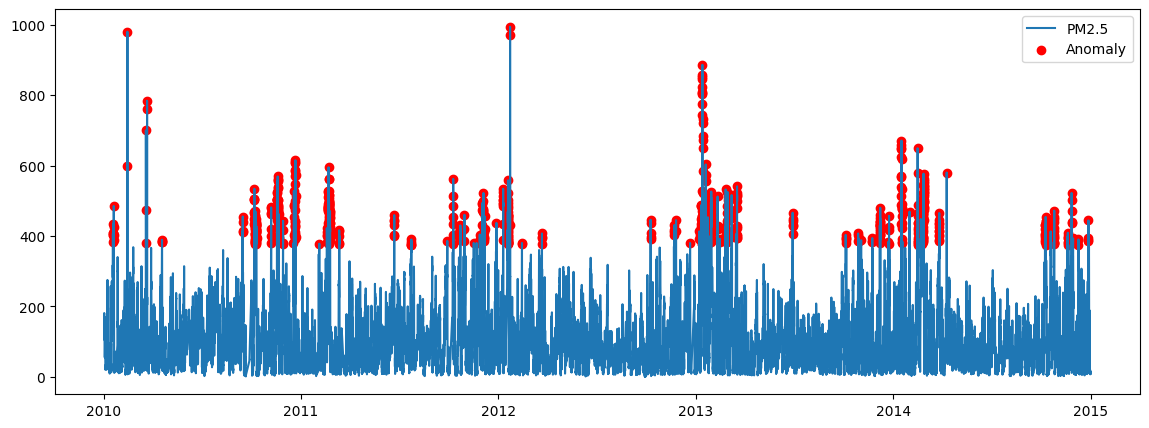

In [6]:
plt.figure(figsize=(14,5))
plt.plot(df["pm2.5"], label="PM2.5")
plt.scatter(df[df["anomaly_z"]==1].index,
            df[df["anomaly_z"]==1]["pm2.5"],
            color='red', label="Anomaly")
plt.legend()
plt.show()

# Validation

In [7]:
def evaluate_anomalies(df, label):
    total = len(df)
    anomalies = df[label].sum()
    pct = (anomalies / total) * 100
    
    print(f"Total points: {total}")
    print(f"Anomalies detected: {anomalies} ({pct:.2f}%)")

evaluate_anomalies(df, "anomaly_z")

Total points: 41757
Anomalies detected: 769 (1.84%)
